In [11]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import yaml

import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO

from utils.utils import *

In [12]:
FPATH = "../Data/OCR/"
IPATH = FPATH + "images/"
LPATH = FPATH + "labels/"

In [14]:
image_names = []

for images in os.listdir(LPATH + 'train/'):
    if images.endswith('.txt'):
        image_name = images.replace('.txt', '')
        image_names.append(image_name)

image_names[:5]

['0',
 '0108651474_crop_0_jpg.rf.b3254c168dd6fc43da36a701b0685bb2',
 '0160IMA_png.rf.59ce2dcd543219298d2f74bf40d337fa',
 '01d5a548-0001-0004-0000-000001169538_w948_r1-778_fpx53-05_fpy49-97_crop_0_jpg.rf.53e609566c45517ecccef7ef87d24b09',
 '01LGAFA_png.rf.2b5f08308f611d33012f7a1726c10978']

--------------------------------------------------
Reading image: ../Data/OCR/images/train/0.jpg
Reading label file: ../Data/OCR/labels/train/0.txt


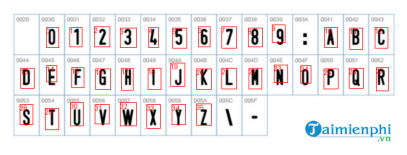

--------------------------------------------------
Reading image: ../Data/OCR/images/train/0108651474_crop_0_jpg.rf.b3254c168dd6fc43da36a701b0685bb2.jpg
Reading label file: ../Data/OCR/labels/train/0108651474_crop_0_jpg.rf.b3254c168dd6fc43da36a701b0685bb2.txt


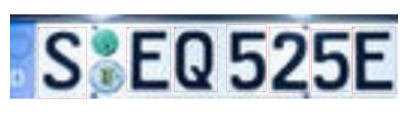

--------------------------------------------------
Reading image: ../Data/OCR/images/train/0160IMA_png.rf.59ce2dcd543219298d2f74bf40d337fa.jpg
Reading label file: ../Data/OCR/labels/train/0160IMA_png.rf.59ce2dcd543219298d2f74bf40d337fa.txt


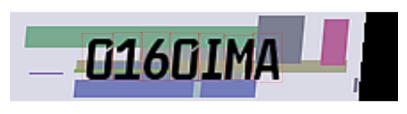

--------------------------------------------------
Reading image: ../Data/OCR/images/train/01d5a548-0001-0004-0000-000001169538_w948_r1-778_fpx53-05_fpy49-97_crop_0_jpg.rf.53e609566c45517ecccef7ef87d24b09.jpg
Reading label file: ../Data/OCR/labels/train/01d5a548-0001-0004-0000-000001169538_w948_r1-778_fpx53-05_fpy49-97_crop_0_jpg.rf.53e609566c45517ecccef7ef87d24b09.txt


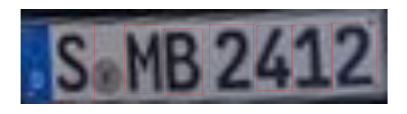

--------------------------------------------------
Reading image: ../Data/OCR/images/train/01LGAFA_png.rf.2b5f08308f611d33012f7a1726c10978.jpg
Reading label file: ../Data/OCR/labels/train/01LGAFA_png.rf.2b5f08308f611d33012f7a1726c10978.txt


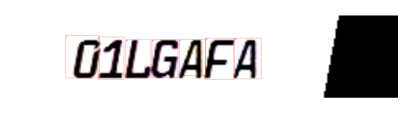

--------------------------------------------------
Reading image: ../Data/OCR/images/train/02ZIJJ6_png.rf.d6928357546a92b615034cf0e28238c9.jpg
Reading label file: ../Data/OCR/labels/train/02ZIJJ6_png.rf.d6928357546a92b615034cf0e28238c9.txt


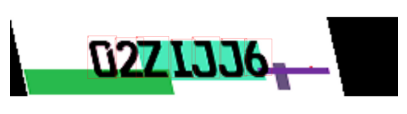

--------------------------------------------------
Reading image: ../Data/OCR/images/train/033RSXP_png.rf.509ef75cbe00c993ea8b5f1377a2daec.jpg
Reading label file: ../Data/OCR/labels/train/033RSXP_png.rf.509ef75cbe00c993ea8b5f1377a2daec.txt


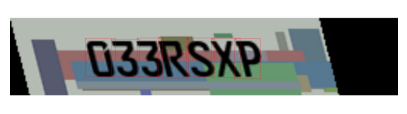

--------------------------------------------------
Reading image: ../Data/OCR/images/train/033T4JB_png.rf.2f7e497e61f6a48c7285e47665a91026.jpg
Reading label file: ../Data/OCR/labels/train/033T4JB_png.rf.2f7e497e61f6a48c7285e47665a91026.txt


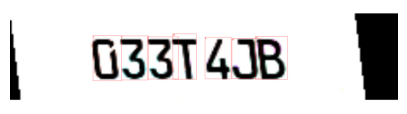

--------------------------------------------------
Reading image: ../Data/OCR/images/train/03UG4NU_png.rf.e0e87a70fb5e34dbff1da1afc27d06a5.jpg
Reading label file: ../Data/OCR/labels/train/03UG4NU_png.rf.e0e87a70fb5e34dbff1da1afc27d06a5.txt


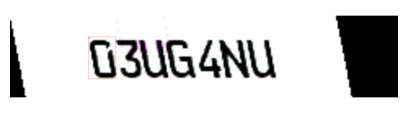

--------------------------------------------------
Reading image: ../Data/OCR/images/train/048R6JQ_png.rf.a205821fa88007b8a0181f6589e39eff.jpg
Reading label file: ../Data/OCR/labels/train/048R6JQ_png.rf.a205821fa88007b8a0181f6589e39eff.txt


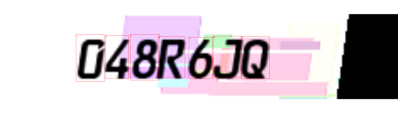

In [15]:
# Visualize some images with labels from the dataset
for i in range(10):

    image_path = IPATH + 'train/' + image_names[i] + '.jpg'
    label_file_path = LPATH + 'train/' + image_names[i] + '.txt'

    print("-" * 50)
    print("Reading image:", image_path)
    print("Reading label file:", label_file_path)

    # Load labels
    labels = read_yolo_label_file(label_file_path)  # Function from previous step

    # Draw bounding boxes on the image
    image_with_bbox = draw_bounding_box_on_image(image_path, labels)

    # Display the image
    plt.figure(figsize=(5, 10))
    plt.imshow(image_with_bbox)
    plt.axis('off')  # Remove axis
    plt.show()

In [16]:
data_yaml = dict(
    train = "images/train",
    val = "images/val",
    nc = 36,
    names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
)

with open(FPATH + "data.yaml", 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=False)

In [6]:
# Load a model
model_n = YOLO("LP_Recog_YOLOv11n.pt")

# Train the model
folder_path = os.path.dirname(os.getcwd())
print(folder_path)

# if not os.path.exists("LP_Recog_YOLOv11n.pt"):
results = model_n.train(data= folder_path + "/Data/OCR/data.yaml", epochs=100, imgsz=128, workers=4, batch=128, device='cuda', name='LP_Recog_YOLOv11n',
                        fliplr=False, degrees=30.0, perspective=0.01)

d:\Study\Avance Deep Learning - LP Detection
New https://pypi.org/project/ultralytics/8.3.15 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.12  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=LP_Recog_YOLOv11n.pt, data=d:\Study\Avance Deep Learning - LP Detection/Data/OCR/data.yaml, epochs=100, time=None, patience=100, batch=128, imgsz=128, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=LP_Recog_YOLOv11n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False,

train: Scanning D:\Study\Avance Deep Learning - LP Detection\Data\OCR\labels\train.cache... 3682 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3682/3682 [00:00<?, ?it/s]

train: WARNING  D:\Study\Avance Deep Learning - LP Detection\Data\OCR\images\train\0UHFN0X_png.rf.7e73dc67fbb298a333e9ee00377489c5.jpg: 1 duplicate labels removed
train: WARNING  D:\Study\Avance Deep Learning - LP Detection\Data\OCR\images\train\test49_crop_2_jpg.rf.98de6b076b4bddca3d6c97663e2ed27d.jpg: 1 duplicate labels removed
train: WARNING  D:\Study\Avance Deep Learning - LP Detection\Data\OCR\images\train\test49_crop_2_jpg.rf.9e5f59bb64e222da3a71d1e51ce6675d.jpg: 1 duplicate labels removed
WARNING  Box and segment counts should be equal, but got len(segments) = 1594, len(boxes) = 26714. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\Study\Avance Deep Learning - LP Detection\Data\OCR\labels\val.cache... 823 images, 0 backgrounds, 0 corrupt: 100%|██████████| 823/823 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 245, len(boxes) = 6112. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\LP_Recog_YOLOv11n\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 4 dataloader workers
Logging results to runs\detect\LP_Recog_YOLOv11n
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.872G      1.506      1.061      1.023       1572        128: 100%|██████████| 29/29 [00:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        823       6112      0.882      0.832      0.888      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.858G      1.352      1.004     0.9735       1576        128: 100%|██████████| 29/29 [00:04<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        823       6112      0.896      0.821      0.883      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.887G      1.271     0.9747     0.9507       1635        128: 100%|██████████| 29/29 [00:04<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        823       6112      0.862      0.834      0.882      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.891G      1.235     0.9768     0.9435       1528        128: 100%|██████████| 29/29 [00:04<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        823       6112      0.889      0.826      0.882      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.885G      1.209     0.9787     0.9332       1547        128: 100%|██████████| 29/29 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        823       6112      0.891      0.813      0.877      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.889G      1.181     0.9756     0.9299       1589        128: 100%|██████████| 29/29 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        823       6112      0.869      0.828       0.88      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.885G      1.163     0.9676      0.926       1543        128: 100%|██████████| 29/29 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.877      0.824      0.878      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      0.86G      1.158     0.9663     0.9234       1448        128: 100%|██████████| 29/29 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        823       6112      0.884      0.825      0.881      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.856G      1.136     0.9584     0.9206       1436        128: 100%|██████████| 29/29 [00:05<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        823       6112      0.861      0.843      0.878      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.885G      1.133     0.9515     0.9186       1551        128: 100%|██████████| 29/29 [00:05<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        823       6112        0.9      0.821      0.883      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.854G      1.137     0.9638      0.919       1551        128: 100%|██████████| 29/29 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        823       6112        0.9      0.828      0.883      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.854G      1.125     0.9583     0.9193       1586        128: 100%|██████████| 29/29 [00:04<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        823       6112      0.869      0.831      0.878      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.889G      1.118     0.9381     0.9155       1638        128: 100%|██████████| 29/29 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        823       6112      0.884      0.833       0.88      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.866G      1.124     0.9504     0.9175       1572        128: 100%|██████████| 29/29 [00:05<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.866      0.841      0.881      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.885G      1.119     0.9393     0.9162       1568        128: 100%|██████████| 29/29 [00:04<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        823       6112      0.892      0.824      0.884      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.851G      1.119      0.933     0.9143       1488        128: 100%|██████████| 29/29 [00:05<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.875      0.831      0.887      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.856G      1.122      0.926     0.9172       1464        128: 100%|██████████| 29/29 [00:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.853      0.857      0.887      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.851G      1.124     0.9422     0.9192       1630        128: 100%|██████████| 29/29 [00:05<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        823       6112      0.889       0.82      0.883      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.854G      1.105     0.9337      0.914       1535        128: 100%|██████████| 29/29 [00:05<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        823       6112      0.869      0.834      0.884      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.887G      1.101     0.9257     0.9125       1502        128: 100%|██████████| 29/29 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        823       6112      0.877       0.83      0.883      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.847G      1.102     0.9243     0.9132       1523        128: 100%|██████████| 29/29 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        823       6112      0.882      0.818      0.883      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.851G      1.097     0.9205     0.9122       1649        128: 100%|██████████| 29/29 [00:05<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        823       6112      0.888      0.834      0.888      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.847G      1.094     0.9249     0.9089       1611        128: 100%|██████████| 29/29 [00:05<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.898      0.821      0.884      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.858G      1.099     0.9251      0.912       1615        128: 100%|██████████| 29/29 [00:05<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.888       0.83      0.882       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.879G      1.087     0.9145     0.9109       1675        128: 100%|██████████| 29/29 [00:05<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        823       6112      0.858      0.844      0.883      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.877G      1.083     0.9062     0.9098       1560        128: 100%|██████████| 29/29 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        823       6112      0.882      0.816      0.882      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.854G      1.085     0.9086     0.9115       1557        128: 100%|██████████| 29/29 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.874      0.831      0.881      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.858G      1.079     0.9092     0.9084       1477        128: 100%|██████████| 29/29 [00:05<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.874      0.831       0.88       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.856G      1.087     0.9196     0.9106       1286        128: 100%|██████████| 29/29 [00:05<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.875      0.831      0.883      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.885G      1.076     0.9085     0.9092       1600        128: 100%|██████████| 29/29 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.902      0.819      0.887       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.854G      1.088     0.9209     0.9109       1502        128: 100%|██████████| 29/29 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        823       6112      0.876      0.834      0.888      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.851G      1.076     0.9079     0.9087       1454        128: 100%|██████████| 29/29 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.872      0.837      0.885       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.889G      1.067     0.8938     0.9048       1626        128: 100%|██████████| 29/29 [00:05<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        823       6112      0.873      0.836      0.879      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.858G      1.075     0.9013     0.9058       1478        128: 100%|██████████| 29/29 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.896      0.825      0.884      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.854G      1.073     0.9061     0.9095       1474        128: 100%|██████████| 29/29 [00:05<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.869      0.837      0.882      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.883G      1.072     0.8982     0.9041       1505        128: 100%|██████████| 29/29 [00:05<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        823       6112      0.881      0.837      0.886      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.847G      1.063     0.8998      0.907       1533        128: 100%|██████████| 29/29 [00:05<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        823       6112      0.882      0.838      0.886      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.858G      1.065     0.8941     0.9048       1461        128: 100%|██████████| 29/29 [00:05<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.882      0.836      0.887      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.854G       1.06     0.8969     0.9057       1568        128: 100%|██████████| 29/29 [00:05<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.879      0.842      0.888      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.851G      1.064     0.8968     0.9059       1510        128: 100%|██████████| 29/29 [00:05<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.875      0.826      0.882       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.847G       1.06     0.8951     0.9063       1623        128: 100%|██████████| 29/29 [00:05<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        823       6112      0.867      0.827      0.878      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.858G      1.053     0.8909      0.903       1600        128: 100%|██████████| 29/29 [00:05<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.884      0.832      0.886      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.847G      1.065     0.8932     0.9059       1558        128: 100%|██████████| 29/29 [00:05<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.882      0.822      0.881      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.893G      1.062     0.8888     0.9053       1582        128: 100%|██████████| 29/29 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.875      0.824      0.887      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.877G      1.057     0.8872     0.9059       1475        128: 100%|██████████| 29/29 [00:05<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        823       6112      0.874      0.834      0.884      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.887G      1.059     0.8884     0.9038       1607        128: 100%|██████████| 29/29 [00:05<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.866      0.847      0.887      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.854G      1.052      0.874     0.9026       1552        128: 100%|██████████| 29/29 [00:05<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        823       6112      0.864      0.843      0.884      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.851G      1.058     0.8807      0.904       1586        128: 100%|██████████| 29/29 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        823       6112      0.876       0.84      0.883      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.883G      1.044     0.8735      0.902       1596        128: 100%|██████████| 29/29 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        823       6112       0.89      0.828      0.884      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.891G      1.042      0.889     0.9024       1680        128: 100%|██████████| 29/29 [00:05<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.866      0.846      0.886      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.916G      1.042     0.8696     0.9032       1537        128: 100%|██████████| 29/29 [00:05<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.892       0.83      0.889      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.858G      1.044     0.8756      0.904       1590        128: 100%|██████████| 29/29 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        823       6112      0.885      0.845      0.892      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.883G      1.043     0.8737     0.9039       1489        128: 100%|██████████| 29/29 [00:05<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.892      0.824      0.887      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.851G      1.043     0.8736     0.9015       1476        128: 100%|██████████| 29/29 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        823       6112      0.885      0.832      0.891       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.854G      1.041     0.8777     0.9005       1646        128: 100%|██████████| 29/29 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        823       6112      0.881      0.842      0.889      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.858G      1.047     0.8807      0.901       1553        128: 100%|██████████| 29/29 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.901      0.828      0.886      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.877G      1.042     0.8787     0.9037       1558        128: 100%|██████████| 29/29 [00:05<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        823       6112       0.88      0.837      0.888      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.858G      1.046     0.8781      0.903       1622        128: 100%|██████████| 29/29 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.893      0.832      0.887      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.851G      1.047     0.8803     0.9024       1679        128: 100%|██████████| 29/29 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        823       6112      0.888      0.836      0.887       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.895G      1.044     0.8796     0.9011       1576        128: 100%|██████████| 29/29 [00:05<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.874      0.847      0.888      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.883G      1.033      0.856     0.8985       1506        128: 100%|██████████| 29/29 [00:05<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.885      0.817      0.884      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.858G      1.035     0.8601     0.8994       1537        128: 100%|██████████| 29/29 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.867      0.847      0.888      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.847G      1.041     0.8681     0.9025       1618        128: 100%|██████████| 29/29 [00:05<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        823       6112       0.88      0.831      0.888      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.851G      1.025     0.8619     0.8987       1516        128: 100%|██████████| 29/29 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.879      0.837      0.891      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.847G      1.037     0.8695     0.9001       1609        128: 100%|██████████| 29/29 [00:05<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.891      0.835      0.891      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.858G      1.039     0.8705     0.8989       1471        128: 100%|██████████| 29/29 [00:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        823       6112      0.885      0.844      0.891      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.889G      1.029     0.8611     0.9009       1525        128: 100%|██████████| 29/29 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        823       6112      0.903      0.819      0.888      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      0.86G      1.029     0.8683     0.8988       1401        128: 100%|██████████| 29/29 [00:05<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        823       6112      0.884      0.846       0.89      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.854G      1.027     0.8619     0.8988       1625        128: 100%|██████████| 29/29 [00:05<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.886      0.842      0.889      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.887G      1.028     0.8641     0.9001       1659        128: 100%|██████████| 29/29 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.892      0.825      0.888      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.877G      1.017     0.8615     0.8987       1623        128: 100%|██████████| 29/29 [00:05<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112       0.89      0.826      0.889      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.881G      1.026       0.86     0.8986       1616        128: 100%|██████████| 29/29 [00:05<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        823       6112      0.888      0.834      0.888       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.847G      1.026     0.8586     0.8969       1510        128: 100%|██████████| 29/29 [00:05<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        823       6112      0.884      0.829      0.888      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.891G      1.018     0.8586      0.899       1509        128: 100%|██████████| 29/29 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        823       6112      0.888      0.841      0.888      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.881G      1.021     0.8588     0.8987       1561        128: 100%|██████████| 29/29 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        823       6112      0.891      0.833      0.891      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.847G      1.021      0.854     0.8995       1587        128: 100%|██████████| 29/29 [00:05<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        823       6112      0.885      0.836      0.889      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.847G      1.024      0.848     0.8974       1596        128: 100%|██████████| 29/29 [00:05<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.871      0.844      0.888      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.887G      1.015     0.8465     0.8961       1625        128: 100%|██████████| 29/29 [00:05<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        823       6112       0.88      0.835      0.889      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.847G       1.01     0.8427     0.8957       1647        128: 100%|██████████| 29/29 [00:05<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        823       6112      0.867      0.851      0.889      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.858G      1.014     0.8483     0.8939       1515        128: 100%|██████████| 29/29 [00:05<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        823       6112      0.892      0.834      0.893      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.893G      1.015     0.8557     0.8974       1660        128: 100%|██████████| 29/29 [00:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112      0.888      0.845      0.896      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.885G      1.024     0.8648     0.8999       1585        128: 100%|██████████| 29/29 [00:05<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        823       6112      0.865      0.857      0.893      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.854G       1.01     0.8371     0.8976       1581        128: 100%|██████████| 29/29 [00:05<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.877      0.849      0.891      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.919G      1.012     0.8497     0.8976       1617        128: 100%|██████████| 29/29 [00:05<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.884      0.843      0.892      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.847G      1.009     0.8494     0.8986       1544        128: 100%|██████████| 29/29 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.888      0.845      0.893      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.858G      1.014     0.8472     0.8956       1480        128: 100%|██████████| 29/29 [00:05<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        823       6112      0.885      0.843      0.891      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.881G      1.007     0.8401     0.8983       1474        128: 100%|██████████| 29/29 [00:05<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        823       6112      0.886      0.844      0.893      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.858G       1.01     0.8452     0.8961       1549        128: 100%|██████████| 29/29 [00:05<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        823       6112      0.883       0.85      0.891      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.847G       1.01     0.8385     0.8962       1465        128: 100%|██████████| 29/29 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        823       6112      0.879      0.847      0.889      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.895G       1.01     0.8459     0.8963       1567        128: 100%|██████████| 29/29 [00:05<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        823       6112      0.881      0.849      0.892      0.586


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.826G     0.9826     0.6489     0.8826        707        128: 100%|██████████| 29/29 [00:05<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        823       6112      0.888       0.83      0.886      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      0.83G     0.9442     0.5852     0.8754        708        128: 100%|██████████| 29/29 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.876      0.825      0.878      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.826G     0.9365     0.5735     0.8738        670        128: 100%|██████████| 29/29 [00:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        823       6112      0.872      0.831      0.878      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.843G     0.9285     0.5704     0.8726        656        128: 100%|██████████| 29/29 [00:05<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        823       6112       0.87      0.837       0.88      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.826G     0.9258      0.561     0.8695        675        128: 100%|██████████| 29/29 [00:05<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        823       6112       0.87      0.833       0.88      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      0.83G     0.9223     0.5598     0.8713        693        128: 100%|██████████| 29/29 [00:05<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.878      0.833      0.881      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.826G     0.9186     0.5557      0.871        681        128: 100%|██████████| 29/29 [00:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        823       6112      0.881      0.833      0.882      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.856G     0.9176     0.5543     0.8699        714        128: 100%|██████████| 29/29 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        823       6112      0.877      0.836      0.882      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.849G     0.9119     0.5517     0.8704        664        128: 100%|██████████| 29/29 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        823       6112      0.878      0.834      0.883      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.851G     0.9146     0.5517     0.8699        678        128: 100%|██████████| 29/29 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        823       6112      0.883      0.835      0.883      0.592



100 epochs completed in 0.233 hours.
Optimizer stripped from runs\detect\LP_Recog_YOLOv11n\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\LP_Recog_YOLOv11n\weights\best.pt, 5.4MB

Validating runs\detect\LP_Recog_YOLOv11n\weights\best.pt...
Ultralytics 8.3.12  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,589,172 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


                   all        823       6112      0.864      0.857      0.893      0.605
                     0        316        398       0.96      0.962      0.982      0.694
                     1        478        733      0.984      0.949      0.968      0.556
                     2        336        434      0.963      0.982       0.99      0.698
                     3        276        347      0.955      0.984      0.985      0.692
                     4        309        391      0.972      0.962      0.973      0.646
                     5        485        704       0.98      0.973      0.978       0.71
                     6        289        373      0.976      0.971      0.981      0.701
                     7        294        377      0.963      0.963      0.968      0.639
                     8        258        333      0.921      0.973      0.979      0.689
                     9        389        509      0.982       0.98      0.992      0.696
                     

In [17]:
# Save the model
model_n = YOLO("./runs/detect/LP_Recog_YOLOv11n/weights/best.pt")
model_n.save("LP_Recog_YOLOv11n.pt")
model_n.export(format = ".onnx")

WARNING  Invalid export format='.onnx', updating to format='onnx'
Ultralytics 8.3.12  Python-3.10.15 torch-2.4.1 CPU (12th Gen Intel Core(TM) i7-12650H)
YOLO11n summary (fused): 238 layers, 2,589,172 parameters, 0 gradients, 6.4 GFLOPs

PyTorch: starting from 'runs\detect\LP_Recog_YOLOv11n\weights\best.pt' with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 40, 336) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success  1.5s, saved as 'runs\detect\LP_Recog_YOLOv11n\weights\best.onnx' (10.0 MB)

Export complete (1.8s)
Results saved to D:\Study\Avance Deep Learning - LP Detection\Model\runs\detect\LP_Recog_YOLOv11n\weights
Predict:         yolo predict task=detect model=runs\detect\LP_Recog_YOLOv11n\weights\best.onnx imgsz=128  
Validate:        yolo val task=detect model=runs\detect\LP_Recog_YOLOv11n\weights\best.onnx imgsz=128 data=d:\Study\Avance Deep Learning - LP Detection/Data/OCR/data.yaml  
Visualize:  

'runs\\detect\\LP_Recog_YOLOv11n\\weights\\best.onnx'

In [18]:
DECODE_PLATE = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E',
    15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O',
    25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y',
    35: 'Z'
}

In [28]:
# Example usage with an image
image_path = IPATH + 'train/' + image_names[10] + '.jpg'
image = cv2.imread(image_path)
results = model_n(image, device = 'cpu')[0]
results.show()

# Get bounding boxes and their classes
boxes = results.boxes.xyxy.cpu()  # Get the bounding box coordinates [x_min, y_min, x_max, y_max]
classes = results.boxes.cls.cpu()  # Get the class indices

# Convert to numpy array for easier sorting
boxes_np = np.array(boxes)
classes_np = np.array(classes)

# Sort the bounding boxes and classes
sorted_boxes, sorted_classes = sort_boxes_top_to_down_left_to_right(boxes_np, classes_np)

# Decode the plate text
plate_text = ''.join([DECODE_PLATE[int(cls)] for cls in sorted_classes])
print(f"Detected plate text: {plate_text}")


0: 32x128 1 0, 1 4, 1 7, 1 9, 1 G, 1 K, 1 N, 12.6ms
Speed: 0.0ms preprocess, 12.6ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 128)
Detected plate text: 04GK79N


In [30]:
import pandas as pd

# Load the results CSV file
results = pd.read_csv('./runs/detect/LP_Recog_YOLOv11n/results.csv')

# Get the accuracy metrics for the last epoch
last_epoch_metrics = results.iloc[-1]

precision = last_epoch_metrics['metrics/precision(B)']
recall = last_epoch_metrics['metrics/recall(B)']
map50 = last_epoch_metrics['metrics/mAP50(B)']
map50_95 = last_epoch_metrics['metrics/mAP50-95(B)']

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"mAP@50: {map50}")
print(f"mAP@50-95: {map50_95}")

Precision: 0.88337
Recall: 0.83514
mAP@50: 0.88348
mAP@50-95: 0.59219
